Let's try and do a game in which delta=0 and see if this conforms to expectations, if this is right then the problem may be with the bias meiosis mechanism.

In [5]:
from assortative_mating import *
from assortative_mating.objects.individual import constant_assortment_individual as CI
from assortative_mating.helpers.game_theory_helpers import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [50]:
#A function without an argument that returns an individual with zero assortment
def no_assort():
    return CI(0)
s, delta = 1., 0.9
def fairness(h):
    mod = Model.from_function( no_assort, 128, h = h, delta= delta, s = s, graphs = False )
    mod.go()
    return mod.final_fairness

In [ ]:
x = np.linspace( -5,2 , 21 )
y = list(map(fairness,x))

In [ ]:
plt.figure( figsize = (16,9) )
plt.scatter(x,y)
##Expected ESS
y2 = [ ESS_h_s_delta(h,s,delta) for h in x ]
plt.plot(x,y2)

(-0.1, 1.1)

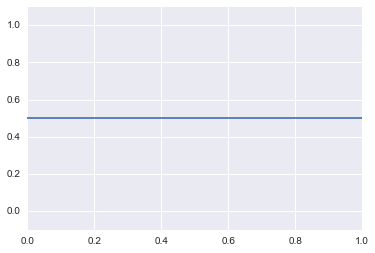

In [44]:
m1,m2 = 1,1
def p_select(delta):
    p_select_m1 = 0.5*( 1 + ( 1 - m1 )*delta - (1 - m2 )*delta )
    return p_select_m1
plt.figure()
x = np.linspace( 0, 1, 11 )
plt.plot(x , list( map(p_select, x) ))
plt.ylim([-0.1,1.1])

Everything seems to be as expected, let's do an ST sweep

In [10]:
from assortative_mating.helpers.game_theory_helpers import hd_from_STs
def fairness_ST(S,T):
    """
    Return the fairness as a function of S and T
    
    """
    s = 1
    _,delta = hd_from_STs( S, T, s = s )
    try:
        h = -T/S
    except ZeroDivisionError:
        h = 99999
    mod = Model.from_function( no_assort, 128, h = h, delta= delta, s = s, graphs = False )
    mod.go()
    return mod.final_fairness

In [45]:
import sweepy

In [ ]:
sweepy.sweep_func( fairness_ST, [ ['T', 0,2,11], ['S', -1, 1, 11] ] );

In [ ]:
h,delta = 0.1, 1.1
S,T = get_ST( h = h, delta = delta, s= 1)
print( np.array( [[ 0, (1-h)*(1-delta)],[ (1-h)*(1+delta),1 ] ]  )  )
print( np.array( [[ 0, S ],[ T,1 ] ]  )  )

In [47]:
def fairness_hd(h,delta):
    """
    Fairness as a function of h and delta.
    """
    s = 1
    mod = Model.from_function( no_assort, 128, h = h, delta= delta, s = s, graphs = False )
    mod.go()
    return mod.final_fairness

/home/simontudge/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


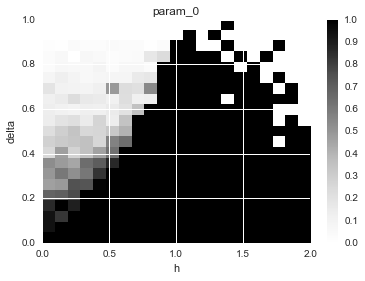

In [49]:
sweepy.sweep_func( fairness_hd, [ ['h', 0, 2, 21 ], ['delta', 0, 1, 21] ] );

Let's have a look at the random choice function